In [1]:
BASE_DIR = '../'*3
DATASET_DIR = BASE_DIR+'code/util/dataset/dataset_dummy.ipynb'
EXTMODEL_DIR = BASE_DIR + 'code/CNN/cnn_ext_model/ext_model.ipynb'

In [119]:
%run {DATASET_DIR}
%run {EXTMODEL_DIR}

Using device: cpu
Using PyTorch version: 1.9.0
a


In [120]:
imagenet = DummyDataset('imagenet', 'select',[3,299,299],200)

200


In [121]:
CnnExtModel.set_macro('v3_preproc', 
          ['serial',
              ['conv',{'ksize':3,'stride':2,'chn':32, 'padding':'VALID'}],
              ['conv',{'ksize':3,'chn':32, 'padding':'VALID'}],
              ['conv',{'ksize':3,'chn':64, 'padding':'SAME'}],
              ['max',{'ksize':3, 'stride':2, 'padding':'VALID'}],
              ['conv',{'ksize':1,'chn':80,'padding':'VALID'}],
              ['conv',{'ksize':3,'chn':192,'padding':'VALID'}],
              ['max',{'ksize':3, 'stride':2,'padding':'VALID'}]
          
          ]
                     )

In [122]:
CnnExtModel.set_macro('v3_inception1',
        ['parallel',
            ['conv',{'ksize':1, 'chn':64}],
         
            ['serial',
                ['conv',{'ksize':1,'chn':48}],
                ['conv',{'ksize':5, 'chn':64}]],
         
            ['serial',
                ['conv',{'ksize':1,'chn':64}],
                 ['conv',{'ksize':3,'chn':96}],
                 ['conv',{'ksize':3,'chn':96}]],
         
            ['serial',
                ['avg',{'ksize':3,'stride':1}],
                ['conv',{'ksize':1,'chn':'#chn'}]]
        
        ]
                    
                     )

In [123]:
CnnExtModel.set_macro('v3_resize1',
            ['parallel',
                ['conv',{'ksize':3,'stride':2,'chn':384}],
                ['serial',
                 ['conv',{'ksize':1,'chn':64}],
                 ['conv',{'ksize':3,'chn':94}],
                 ['conv',{'ksize':3,'stride':2,'chn':96}]],
                ['max',{'ksize':3,'stride':2}]
            
            ]                     
                    
                     )

In [124]:
CnnExtModel.set_macro('v3_inception2',
    ['parallel',
        ['conv', {'ksize':1, 'chn':192}],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':192}]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':192}]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':192}]]])

In [125]:
CnnExtModel.set_macro('v3_resize2',
    ['parallel',
        ['serial',
            ['conv', {'ksize':1, 'chn':192}],
            ['conv', {'ksize':3, 'stride':2, 'chn':320}]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':192}],
            ['conv', {'ksize':[1,7], 'chn':192}],
            ['conv', {'ksize':[7,1], 'chn':192}],
            ['conv', {'ksize':[3,3], 'stride':[2,2], 'chn':192}]],
        ['max', {'ksize':3, 'stride':2}]])

In [126]:
CnnExtModel.set_macro('v3_inception3',
    ['parallel',
        ['conv', {'ksize':1, 'chn':320}],
        ['serial',
            ['conv', {'ksize':[3,3], 'chn':384}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':384}],
                ['conv', {'ksize':[3,1], 'chn':384}]]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':448}],
            ['conv', {'ksize':[3,3], 'chn':384}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':384}],
                ['conv', {'ksize':[3,1], 'chn':384}]]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':192}]]])

In [127]:
CnnExtModel.set_macro('v3_postproc',
    ['serial',
        ['avg', {'stride':8}],
        ['dropout', {'keep_prob':0.7}]])

In [128]:
CnnExtModel.set_macro('inception_v3',
    ['serial',
        ['custom', {'name':'v3_preproc'}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':32}}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':64}}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':64}}],
        ['custom', {'name':'v3_resize1'}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':128}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':160}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':160}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':192}}],
        ['custom', {'name':'v3_resize2'}],
        ['custom', {'name':'v3_inception3'}],
        ['custom', {'name':'v3_inception3'}],
        ['custom', {'name':'v3_postproc'}]])

In [129]:
inception_v3 = CnnExtModel('inception_v3', imagenet,
                   [['custom', {'name':'inception_v3'}]], dump_structure=True)

custom inception_v3
  serial
    custom v3_preproc
      serial
        1: conv, [3, 299, 299]=>[32, 148, 148]pm : 32x3x3x3+32 = 896
        2: conv, [32, 148, 148]=>[32, 146, 146]pm : 32x32x3x3+32 = 9248
        3: conv, [32, 146, 146]=>[64, 146, 146]pm : 64x32x3x3+64 = 18496
        4: max, [64, 146, 146]=>[64, 72, 72]
        5: conv, [64, 72, 72]=>[80, 72, 72]pm : 80x64x1x1+80 = 5200
        6: conv, [80, 72, 72]=>[192, 70, 70]pm : 192x80x3x3+192 = 138432
        7: max, [192, 70, 70]=>[192, 34, 34]
    custom v3_inception1
      parallel
        8: conv, [192, 34, 34]=>[64, 34, 34]pm : 64x192x1x1+64 = 12352
        serial
          9: conv, [192, 34, 34]=>[48, 34, 34]pm : 48x192x1x1+48 = 9264
          10: conv, [48, 34, 34]=>[64, 34, 34]pm : 64x48x5x5+64 = 76864
        serial
          11: conv, [192, 34, 34]=>[64, 34, 34]pm : 64x192x1x1+64 = 12352
          12: conv, [64, 34, 34]=>[96, 34, 34]pm : 96x64x3x3+96 = 55392
          13: conv, [96, 34, 34]=>[96, 34, 34]pm : 96x96x3x3

          102: conv, [2048, 8, 8]=>[448, 8, 8]pm : 448x2048x1x1+448 = 917952
          103: conv, [448, 8, 8]=>[384, 8, 8]pm : 384x448x3x3+384 = 1548672
          parallel
            104: conv, [384, 8, 8]=>[384, 8, 8]pm : 384x384x1x3+384 = 442752
            105: conv, [384, 8, 8]=>[384, 8, 8]pm : 384x384x3x1+384 = 442752
        serial
          106: avg, [2048, 8, 8]=>[2048, 8, 8]
          107: conv, [2048, 8, 8]=>[192, 8, 8]pm : 192x2048x1x1+192 = 393408
    custom v3_postproc
      serial
        108: avg, [2048, 8, 8]=>[2048, 1, 1]
        109: dropout, [2048, 1, 1]=>[2048, 1, 1]
110: full, [2048, 1, 1]=>[200]pm :200x2048+200=409800
Total parameter count : 32398886


In [130]:
inception_v3.net

[normal(
   (layer): Sequential(
     (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=valid)
     (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
     (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
     (4): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), padding=valid)
     (5): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), padding=valid)
     (6): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
 ),
 P_Block(
   (v3_inception1_2): Sequential(
     (dict): ModuleDict(
       (v3_inception1_2_1): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
       (v3_inception1_2_2): Conv2d(192, 48, kernel_size=(1, 1), stride=(1, 1), padding=same)
       (v3_inception1_2_3): Conv2d(48, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
       (v3_inception1_2_4): Conv2d(192, 64, ker

In [13]:
# F_DATA_DIR = BASE_DIR+ 'code/util/dataset/flower_prepro.ipynb'

# %run {F_DATA_DIR}

# fd = FlowersDataset([96,96], [3,96,96])

Using device: cpu
Using PyTorch version: 1.9.0


In [131]:
CnnExtModel.set_macro('flower_preproc',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':6, 'actions':'#act'}]])

CnnExtModel.set_macro('flower_inception1',
    ['parallel',
        ['conv', {'ksize':1, 'chn':4, 'actions':'#act'}],
        ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':4, 'actions':'#act'}]]])

CnnExtModel.set_macro('flower_resize',
    ['parallel',
        ['conv', {'ksize':3, 'stride':2, 'chn':12, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':3, 'chn':12, 'actions':'#act'}],
            ['conv', {'ksize':3, 'stride':2, 'chn':12, 'actions':'#act'}]],
        ['avg', {'ksize':3, 'stride':2}]])

CnnExtModel.set_macro('flower_inception2',
    ['parallel',
        ['conv', {'ksize':1, 'chn':8, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':[3,3], 'chn':8, 'actions':'#act'}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':8, 'actions':'#act'}],
                ['conv', {'ksize':[3,1], 'chn':8, 'actions':'#act'}]]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':8, 'actions':'#act'}],
            ['conv', {'ksize':[3,3], 'chn':8, 'actions':'#act'}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':8, 'actions':'#act'}],
                ['conv', {'ksize':[3,1], 'chn':8, 'actions':'#act'}]]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':8, 'actions':'#act'}]]])

CnnExtModel.set_macro('flower_postproc',
    ['serial',
        ['avg', {'stride':6}],
        ['dropout', {'keep_prob':0.7}]])

In [132]:
CnnExtModel.set_macro('inception_flower',
    ['serial',
        ['custom', {'name':'flower_preproc', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception1', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception1', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception2', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception2', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_postproc', 'args':{'#act':'#act'}}]])

In [133]:
conf_flower_LA = ['custom', {'name':'inception_flower', 'args':{'#act':'LA'}}]
model_flower_LA = CnnExtModel('inception_flower', fd, 
                         conf_flower_LA, dump_structure=False)

In [134]:
EPOCH = 1
BATCH_SIZE=20
NUM_WORKERS=0
LEARNING_RATE = 0.0003

Model inception_flower train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): normal(
      (layer): Sequential(
        (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
    )
    (1): P_Block(
      (flower_inception1_2): Sequential(
        (dict): ModuleDict(
          (flower_inception1_2_1): Conv2d(6, 4, kernel_size=(1, 1), stride=(1, 1), padding=same)
          (flower_inception1_2_2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (flower_inception1_2_3): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (flower_inception1_2_4): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (flower_inception1_2_5): AvgPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (flower_inception1_2_6): Conv2d(6, 4, kernel_size=(1, 1), stride=(1, 1), padding=same)
        )
      )
    )
    (2): P_Block(
      (flower_resize_3): Sequential(
        

Model inception_flower test report: accuracy = 0.270, (13 secs)

Model inception_flower Visualization


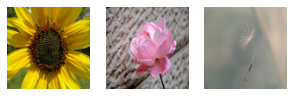

추정확률분포 [20,22,18,18,23] => 추정 tulip : 정답 sunflower => X
추정확률분포 [18,23,19,19,21] => 추정 dandelion : 정답 rose => X
추정확률분포 [16,25,17,18,24] => 추정 dandelion : 정답 dandelion => O


In [135]:
model_flower_LA.exec_all(epoch_count=EPOCH, report=20, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )
# model_flower_LA.exec_all(report=1)

In [ ]:
model_flower_LA.layers[0]

In [ ]:
import torch.nn as nn
len([nn.Linear(2,2)])

In [ ]:
len([model_flower_LA.net])